In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import torch
import torch.optim as optim
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

# Homework 5 Problem 1: Non-linear Temperature Prediction

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u
print(t_c)
print()
print(t_u)

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])


In [3]:
def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

In [4]:
#Calculating Loss 
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
def training_loop(n_epochs, optimizer, params, t_u, t_c, epoch_report_val = 500):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()

        if epoch % epoch_report_val == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [6]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learningRate = 1e-4
optimizer = optim.SGD([params], lr=learningRate)
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([-2.3139e+03, -3.5181e+01, -5.9642e-01], requires_grad=True)

In [7]:
rates = [0.1, 0.01, 0.001, 0.0001]
learningRate = rates[0]
learningRate

0.1

In [8]:
# Testing Stochastic gradient descent (SGD) against different learning rates.
for rate in rates:
    print("When Learning Rate is", rate)
    
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    learning_rate = rate
    optimizer = optim.SGD([params], lr=learning_rate) 

    training_loop(
        n_epochs = 5000, 
        optimizer = optimizer,
        params = params, 
        t_u = t_un,
        t_c = t_c)
        
    print(params)

    print('\n')

When Learning Rate is 0.1
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
tensor([nan, nan, nan], requires_grad=True)


When Learning Rate is 0.01
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
tensor([nan, nan, nan], requires_grad=True)


When Learning Rate is 0.001
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
tensor([nan, nan, nan], requires_grad=True)


When Learning Rate is 0.0001
Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.37

In [9]:
# Testing Adaptive Moment Estimation for gradient descent using different learning rates
for rate in rates:
    print("When Learning Rate is", rate)
    
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    learning_rate = rate
    optimizer = optim.Adam([params], lr=learning_rate) 

    training_loop(
        n_epochs = 5000, 
        optimizer = optimizer,
        params = params, 
        t_u = t_un,
        t_c = t_c)
    
    print(params)
    
    print('\n')

When Learning Rate is 0.1
Epoch 500, Loss 2.782508
Epoch 1000, Loss 2.486027
Epoch 1500, Loss 2.261514
Epoch 2000, Loss 2.144077
Epoch 2500, Loss 2.101927
Epoch 3000, Loss 2.092149
Epoch 3500, Loss 2.090817
Epoch 4000, Loss 2.090725
Epoch 4500, Loss 2.090722
Epoch 5000, Loss 2.090721
tensor([  0.2830,   2.4760, -10.6496], requires_grad=True)


When Learning Rate is 0.01
Epoch 500, Loss 6.111171
Epoch 1000, Loss 3.936777
Epoch 1500, Loss 3.117804
Epoch 2000, Loss 2.931840
Epoch 2500, Loss 2.871259
Epoch 3000, Loss 2.812938
Epoch 3500, Loss 2.744089
Epoch 4000, Loss 2.664675
Epoch 4500, Loss 2.576368
Epoch 5000, Loss 2.482456
tensor([ 0.4673,  0.4768, -5.6706], requires_grad=True)


When Learning Rate is 0.001
Epoch 500, Loss 103.795067
Epoch 1000, Loss 13.018494
Epoch 1500, Loss 8.064861
Epoch 2000, Loss 7.688990
Epoch 2500, Loss 7.295182
Epoch 3000, Loss 6.830940
Epoch 3500, Loss 6.306172
Epoch 4000, Loss 5.739599
Epoch 4500, Loss 5.159212
Epoch 5000, Loss 4.600076
tensor([ 0.4484, -0.

In [10]:
for rate in rates:
    print("When Learning Rate is", rate)
    
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    learning_rate = rate
    optimizer = optim.Adagrad([params], lr=learning_rate) 
    training_loop(
        n_epochs = 5000, 
        optimizer = optimizer,
        params = params, 
        t_u = t_un,
        t_c = t_c)
    print(params)
    
    print('\n')

When Learning Rate is 0.1
Epoch 500, Loss 5.596802
Epoch 1000, Loss 4.238869
Epoch 1500, Loss 3.588042
Epoch 2000, Loss 3.269352
Epoch 2500, Loss 3.109431
Epoch 3000, Loss 3.026104
Epoch 3500, Loss 2.979919
Epoch 4000, Loss 2.951834
Epoch 4500, Loss 2.932615
Epoch 5000, Loss 2.917779
tensor([ 0.5440, -0.3944, -3.3654], requires_grad=True)


When Learning Rate is 0.01
Epoch 500, Loss 130.226944
Epoch 1000, Loss 51.754883
Epoch 1500, Loss 24.967461
Epoch 2000, Loss 14.816223
Epoch 2500, Loss 10.820044
Epoch 3000, Loss 9.208423
Epoch 3500, Loss 8.536825
Epoch 4000, Loss 8.238480
Epoch 4500, Loss 8.088947
Epoch 5000, Loss 7.999007
tensor([ 0.3664,  0.3244, -0.7380], requires_grad=True)


When Learning Rate is 0.001
Epoch 500, Loss 590.399963
Epoch 1000, Loss 556.178894
Epoch 1500, Loss 530.868225
Epoch 2000, Loss 510.160034
Epoch 2500, Loss 492.386841
Epoch 3000, Loss 476.694336
Epoch 3500, Loss 462.575592
Epoch 4000, Loss 449.700409
Epoch 4500, Loss 437.839050
Epoch 5000, Loss 426.825073


In [11]:
for rate in rates:
    print("When Learning Rate is", rate)
    
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    learning_rate = rate
    optimizer = optim.ASGD([params], lr=learning_rate) 

    training_loop(
        n_epochs = 5000, 
        optimizer = optimizer,
        params = params, 
        t_u = t_un,
        t_c = t_c)
    
    print(params)
    
    print('\n')

When Learning Rate is 0.1
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
tensor([nan, nan, nan], requires_grad=True)


When Learning Rate is 0.01
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
tensor([nan, nan, nan], requires_grad=True)


When Learning Rate is 0.001
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
tensor([nan, nan, nan], requires_grad=True)


When Learning Rate is 0.0001
Epoch 500, Loss 10.708604
Epoch 1000, Loss 8.642097
Epoch 1500, Loss 7.171026
Epoch 2000, Loss 6.123503
Epoch 2500, Loss 5.37

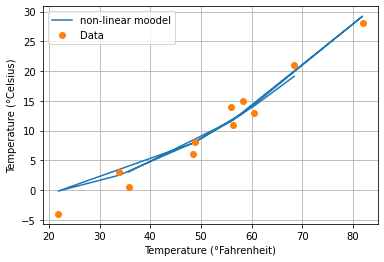

In [12]:
t_p = model(t_un, *params)

plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy(), label = "non-linear moodel")
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label = "Data")
plt.legend()
plt.grid()
plt.show()